# K-Means Clustering

NathanLVZS, 2016-05-03, revised 2016-05-12

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline

## generate data

In [2]:
mean1 = (0, 8)
mean2 = (5, 5)
mean3 = (1, -1)

cov = [[1, 0], [0, 1]]
x1 = np.random.multivariate_normal(mean1, cov, 20)# shape: 20*2
x2 = np.random.multivariate_normal(mean2, cov, 30)
x3 = np.random.multivariate_normal(mean3, cov, 20)


In [3]:
x = np.concatenate((x1, x2, x3), axis=0)
print x.shape

(70L, 2L)


## plot the data

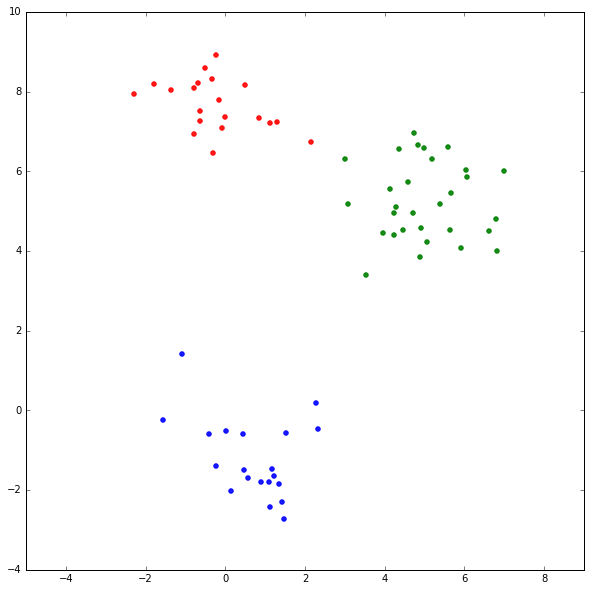

In [4]:
plt.figure(figsize=(10,10), facecolor='white')
plt.scatter(x1[:, 0], x1[:, 1], marker='.', color='red', alpha=0.9, s=80)
plt.scatter(x2[:, 0], x2[:, 1], marker='.', color='green', alpha=0.9, s=80)
plt.scatter(x3[:, 0], x3[:, 1], marker='.', color='blue', alpha=0.9, s=80)
plt.axis('equal')
plt.show()

## k-means implementation

In [5]:
class kmeansclustering:
    def __init__(self, data, k=2, maxiter=100, epsilon=1e-12):
        '''
        data: input data, numpy ndarray
        k: the number of centroids
        '''
        self.data = data
        self.k = k
        self.maxiter = maxiter
        self.epsilon = epsilon
        self.N = len(data)
        self.colors = cm.rainbow(np.linspace(0, 1, self.k))
        self.classes = np.zeros(self.N, dtype=int)        
    
    def getdistmat(self):
        data_sqrowsum = np.sum(self.data * self.data, axis=1)
        cen_sqrowsum = np.sum(self.centroids * self.centroids, axis=1)
        return np.outer(data_sqrowsum, np.ones((1, self.k))) - 2 * np.dot(self.data, self.centroids.T) \
                    + np.outer(np.ones((self.N, 1)), cen_sqrowsum)
    
    def compute_obj(self):
        tempsum = 0
        for i in xrange(self.N):
            tempsum += np.sum(np.square(self.data[i] - self.centroids[self.classes[i]]))
        return tempsum
    
    def kmeans(self, plot=False):
        numiter = 0
        # initialize centroids
        self.centroids = self.data[np.random.choice(self.N, self.k, replace=False), :]
        if plot:
            self.draw(False)
        preval = self.compute_obj()
        while numiter < self.maxiter:
            distmat = self.getdistmat()
            # assign datapoints to clusters
            self.classes = np.argmin(distmat, axis=1)
            # update centroids
            for c in xrange(self.k):
                self.centroids[c] = np.mean(self.data[self.classes == c], axis=0)
            objval = self.compute_obj()
            # check convergence
            if preval - objval < self.epsilon:
                print 'exit before max iterations'
                break
            preval = objval
            if plot:
                self.draw(True)
            numiter += 1
    
    def draw(self, plotcen=True):
        '''
        only for 2-dimension cases
        '''
        plt.figure(figsize=(10,10), facecolor='white')
        colors_data = [self.colors[c] for c in self.classes]
        plt.scatter(self.data[:, 0], self.data[:, 1], color=colors_data, marker='.', alpha=0.9, s=80)
        plt.axis('equal')
        if plotcen:
            plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='o', color=self.colors, s=120)
        plt.show()


## examples

In [6]:
kmc = kmeansclustering(x, 3)

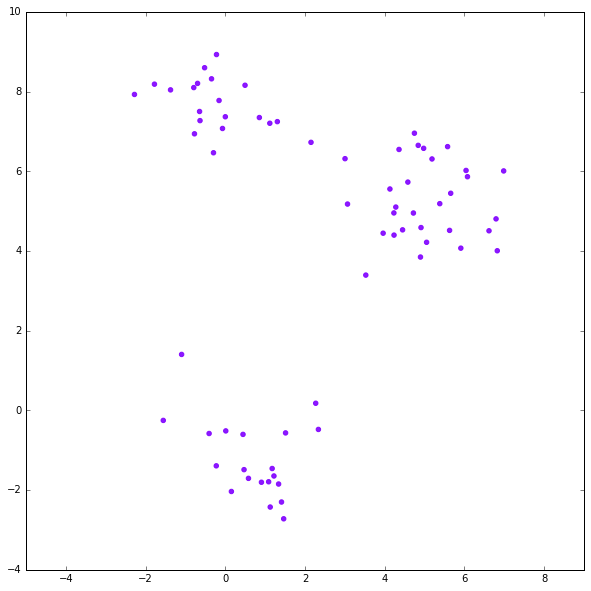

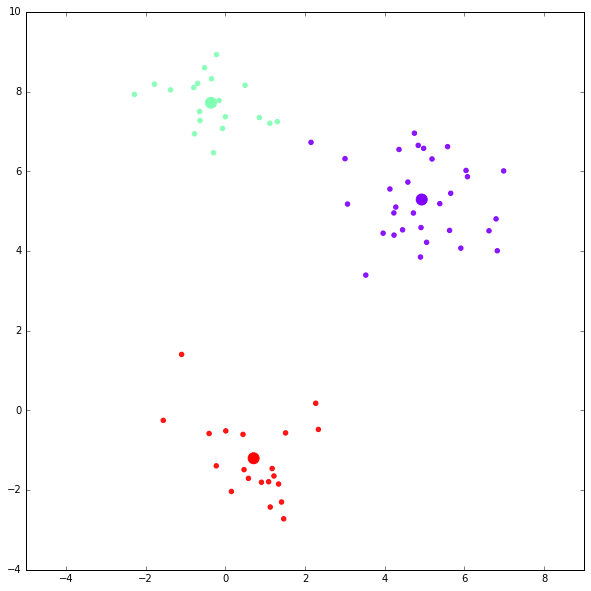

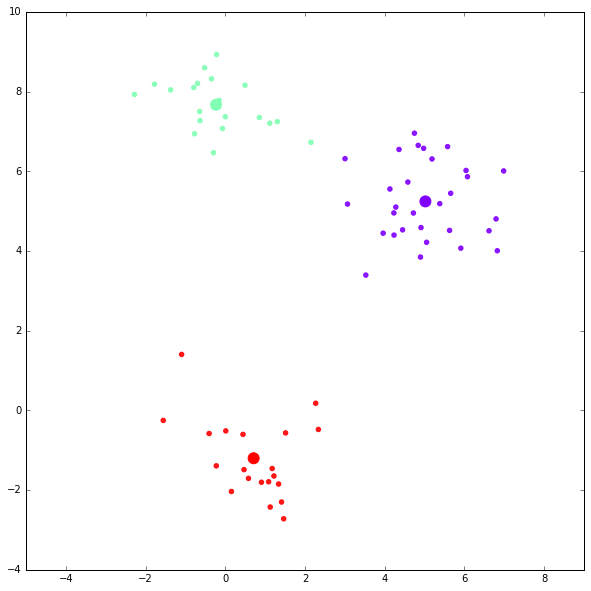

exit before max iterations
[[ 5.02233345  5.24226365]
 [-0.23127781  7.66790274]
 [ 0.71261305 -1.20116246]]


In [7]:
kmc.kmeans(True)
print kmc.centroids

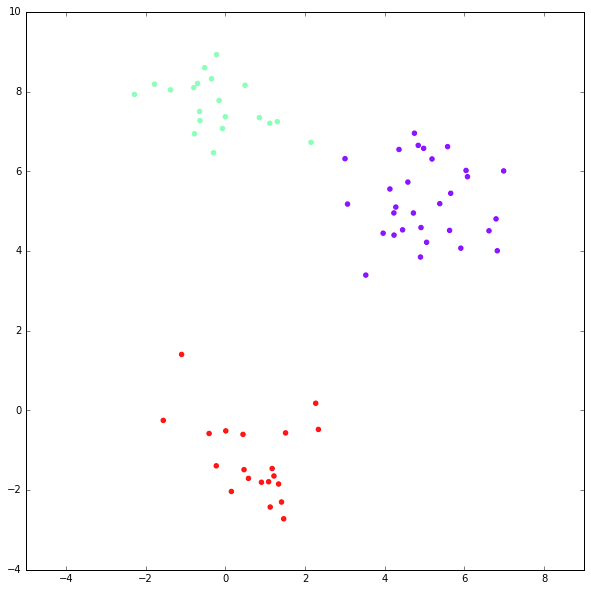

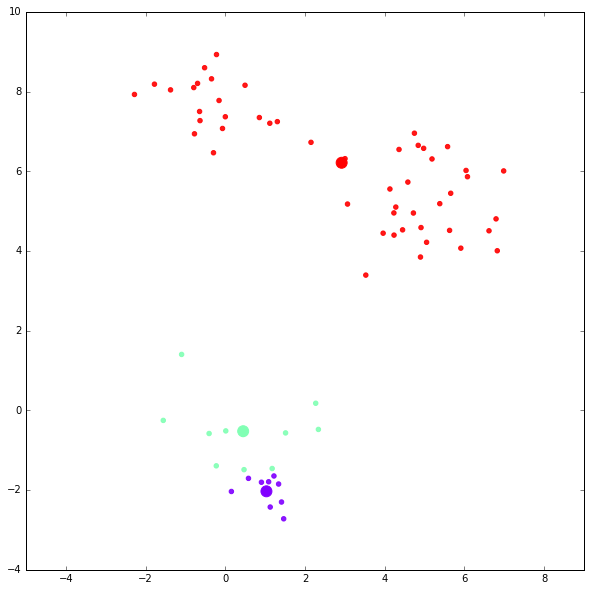

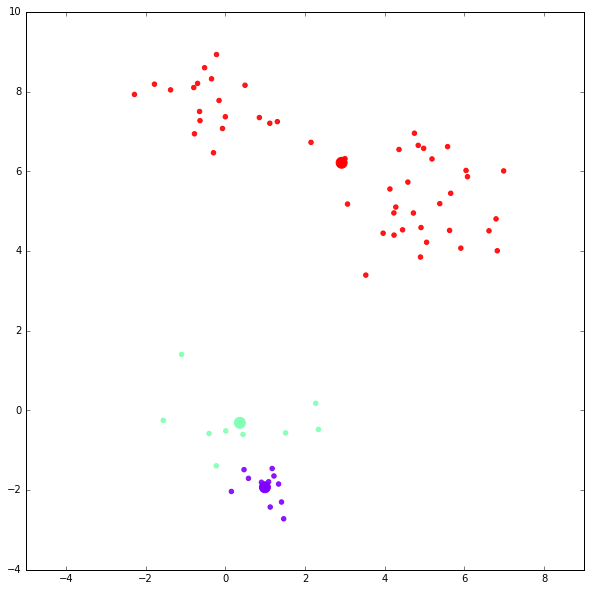

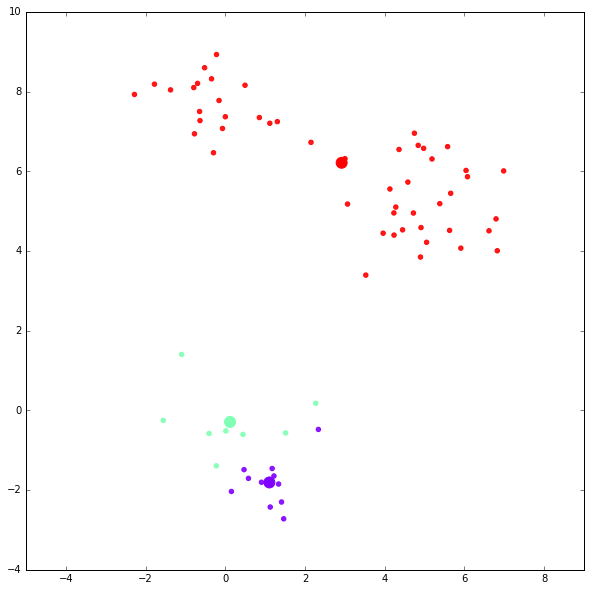

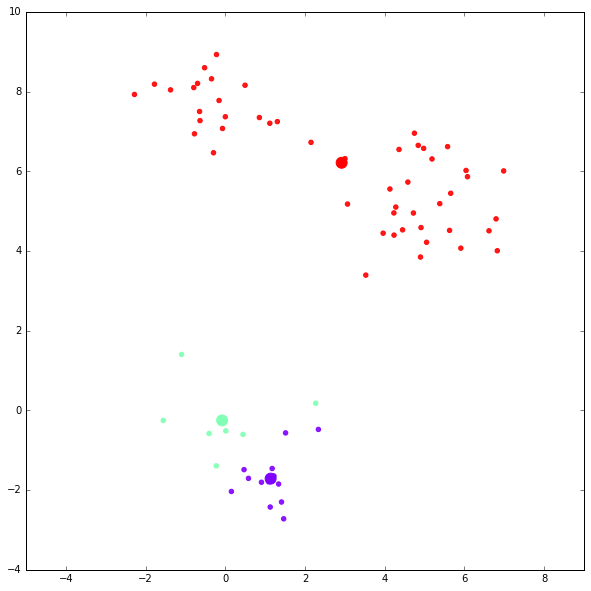

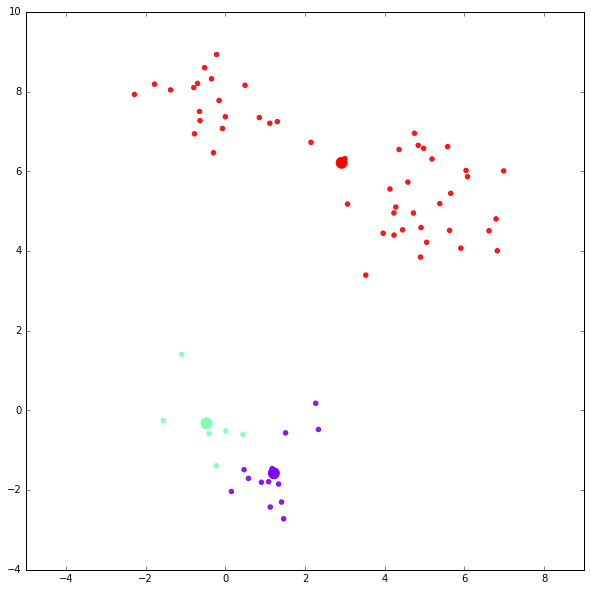

exit before max iterations
[[ 1.21942348 -1.57754001]
 [-0.46994462 -0.32294819]
 [ 2.92088895  6.21251929]]


In [8]:
# run again
kmc.kmeans(True)
print kmc.centroids